## Vector AutoRegressive (VAR)
Vector AutoRegressive (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.

The main difference between other autoregressive models (AR, ARMA, and ARIMA) and the VAR model is that former models are unidirectional (predictors variable influence target variable not vice versa) but VAR is bidirectional.


A typical AR(P) model looks like this:

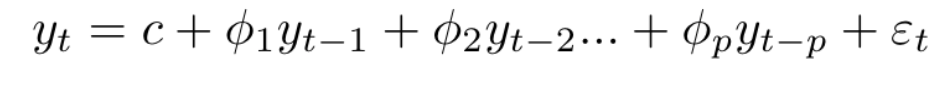

Here:
* c-> intercept
* $phi$ -> coefficient of lags of Y till order P
* epsilon -> error

A K dimensional VAR model of order P, denoted as VAR(P), consider K=2, then the equation will be:

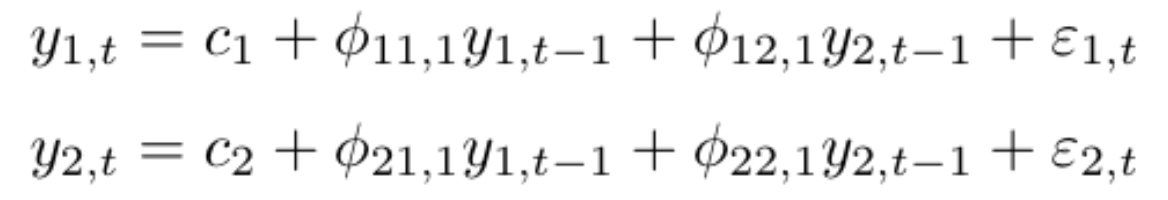

For the VAR model, we have multiple time series variables that influence each other and here, it is modelled as a system of equations with one equation per time series variable. Here k represents the count of time series variables.

In matrix form:

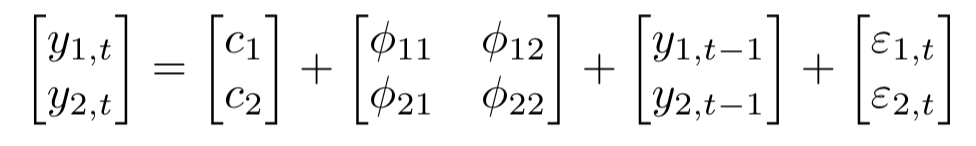

The equation for VAR(P) is:

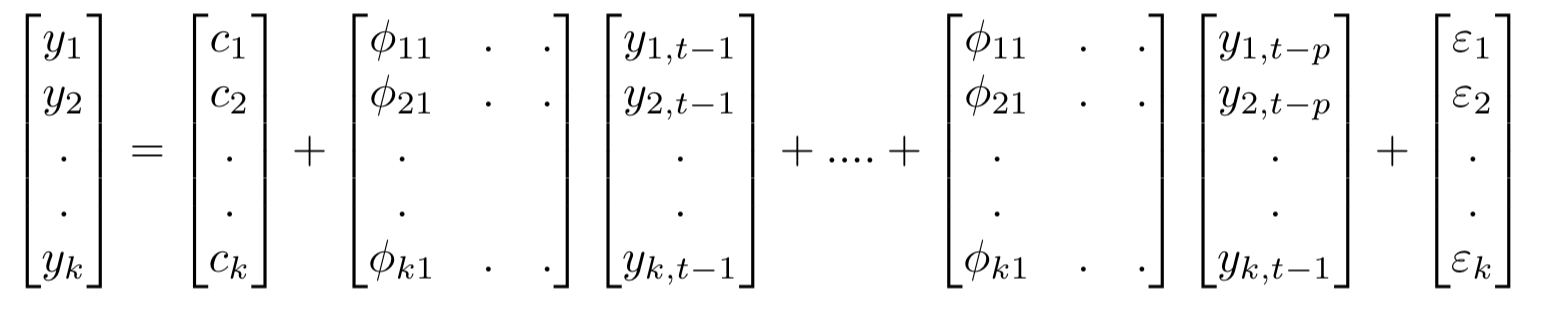


### Procedure

1. Examine the Data
2. Test for stationarity
    1. If the data is non-stationary, take the difference.
    2. Repeat this process until you get the stationary data.
3. Train Test Split
4. Grid search for order P
5. Apply the VAR model with order P
6. Forecast on new data.
7. If necessary, invert the earlier transformation.

## Start work from Here!

In [111]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

PATH="../DATA/"

#### Subset and Adjust Dataset

In [75]:
## Input Data
df=pd.read_csv(PATH+"!Final.csv")

## Set Index as Timeseries and remove fir col
df.index=df["Unnamed: 0"]
df=df.iloc[:,1:]

#### Data Wrangling

In [76]:
## Check for missing value
df.isna().sum()             # No missing value

Tavg              0
RR                0
ff_avg            0
Sea level (cm)    0
dtype: int64

In [77]:
## Total row of dataset
len(df)

426

In [78]:
## Check for data type
df.dtypes

Tavg              float64
RR                float64
ff_avg            float64
Sea level (cm)    float64
dtype: object

#### Test for stationarity

In [121]:
df.mean(axis=1)

Unnamed: 0
1/1/2023 0:00     60.513462
1/2/2023 0:00     83.919097
1/3/2023 0:00     49.245105
1/4/2023 0:00     50.644828
1/5/2023 0:00     59.582759
                    ...    
2/26/2024 0:00    55.217133
2/27/2024 0:00    49.082759
2/28/2024 0:00    55.363811
2/29/2024 0:00    85.200000
3/1/2024 0:00     57.247727
Length: 426, dtype: float64

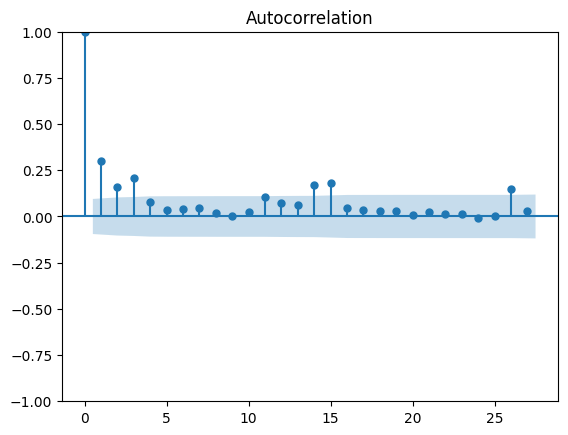

In [117]:
plot_acf(df["RR"])
asu=12

In [ ]:
def all_acf_plot(dataframe):
    

In [109]:
def test_stationarity(dataframe, alpha=0.05):
    temp1=[]
    for column in dataframe.columns:
        temp=adfuller(dataframe[column].dropna())
        temp1.append([column, temp[0], temp[1], "stationary" if temp[1] <= 0.05 else "Non-stationary", temp[2], temp[3]])
    return pd.DataFrame(temp1, columns=["column", "Adf stat", "P-value", "Result", "lags used", "observations"])
# Test stationarity

test_stationarity(df)

,column,Adf stat,P-value,Result,lags used,observations
0,Tavg,-3.853492,2.405068e-03,stationary,5,420
1,RR,-2.818103,5.573406e-02,Non-stationary,15,410
2,ff_avg,-5.812125,4.376626e-07,stationary,5,420
3,Sea level (cm),-3.451338,9.328390e-03,stationary,2,423


##### Differencing Dataset in order to turn every column into stationarity

In [110]:
diff_df=df.diff(1)
test_stationarity(diff_df)      #Datframe reached stationarity

,column,Adf stat,P-value,Result,lags used,observations
0,Tavg,-10.973789,7.761061e-20,stationary,7,417
1,RR,-8.456084,1.613488e-13,stationary,14,410
2,ff_avg,-11.564167,3.216268e-21,stationary,7,417
3,Sea level (cm),-18.282840,2.306316e-30,stationary,1,423


#### Train Test Split